In [ ]:
# !pip install pandas seaborn statsmodels sklearn openpyxl xlrd geopandas pysal ppscore

In [53]:
# General
import pandas as pd
import os
import scripts
import importlib
import numpy as np
import warnings

# Machine Learnign
## Sklearns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Statmodels
from statsmodels.tools import add_constant
import statsmodels.api as sm

## Others
import ppscore as pps
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

# Geo
import geopandas as gpd
import libpysal
import splot
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from pysal.model import spreg

In [54]:
importlib.reload(scripts)

<module 'scripts' from '/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/scripts.py'>

### Carregar Dados

In [73]:
df_jan = pd.read_csv('dataset/novo/UF_mercado_imobiliario_jan vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_jan.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_compra_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_01
CD_UF,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,1457.0,240000.0,2.313967e+08,8.041858,61.24,3055149,0.000477,0.078556,75.739903,8728.0
52,GO,Goiás,20.907243,0.735,810.97,8081.0,180000.0,3.114260e+08,7.754394,82.62,7113540,0.001136,0.025304,43.779325,17600.0
51,MT,Mato Grosso,3.904110,0.725,762.52,9696.0,175000.0,1.565940e+08,7.755467,70.00,3526220,0.002750,0.049628,44.408469,8882.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,1854.0,165000.0,1.222186e+08,7.601646,68.32,2809394,0.000660,0.058732,43.503548,6765.0
25,PB,Paraíba,71.533102,0.658,474.94,-2527.0,158540.5,9.884272e+07,7.413085,61.00,4039277,-0.000626,0.039250,24.470400,6561.0


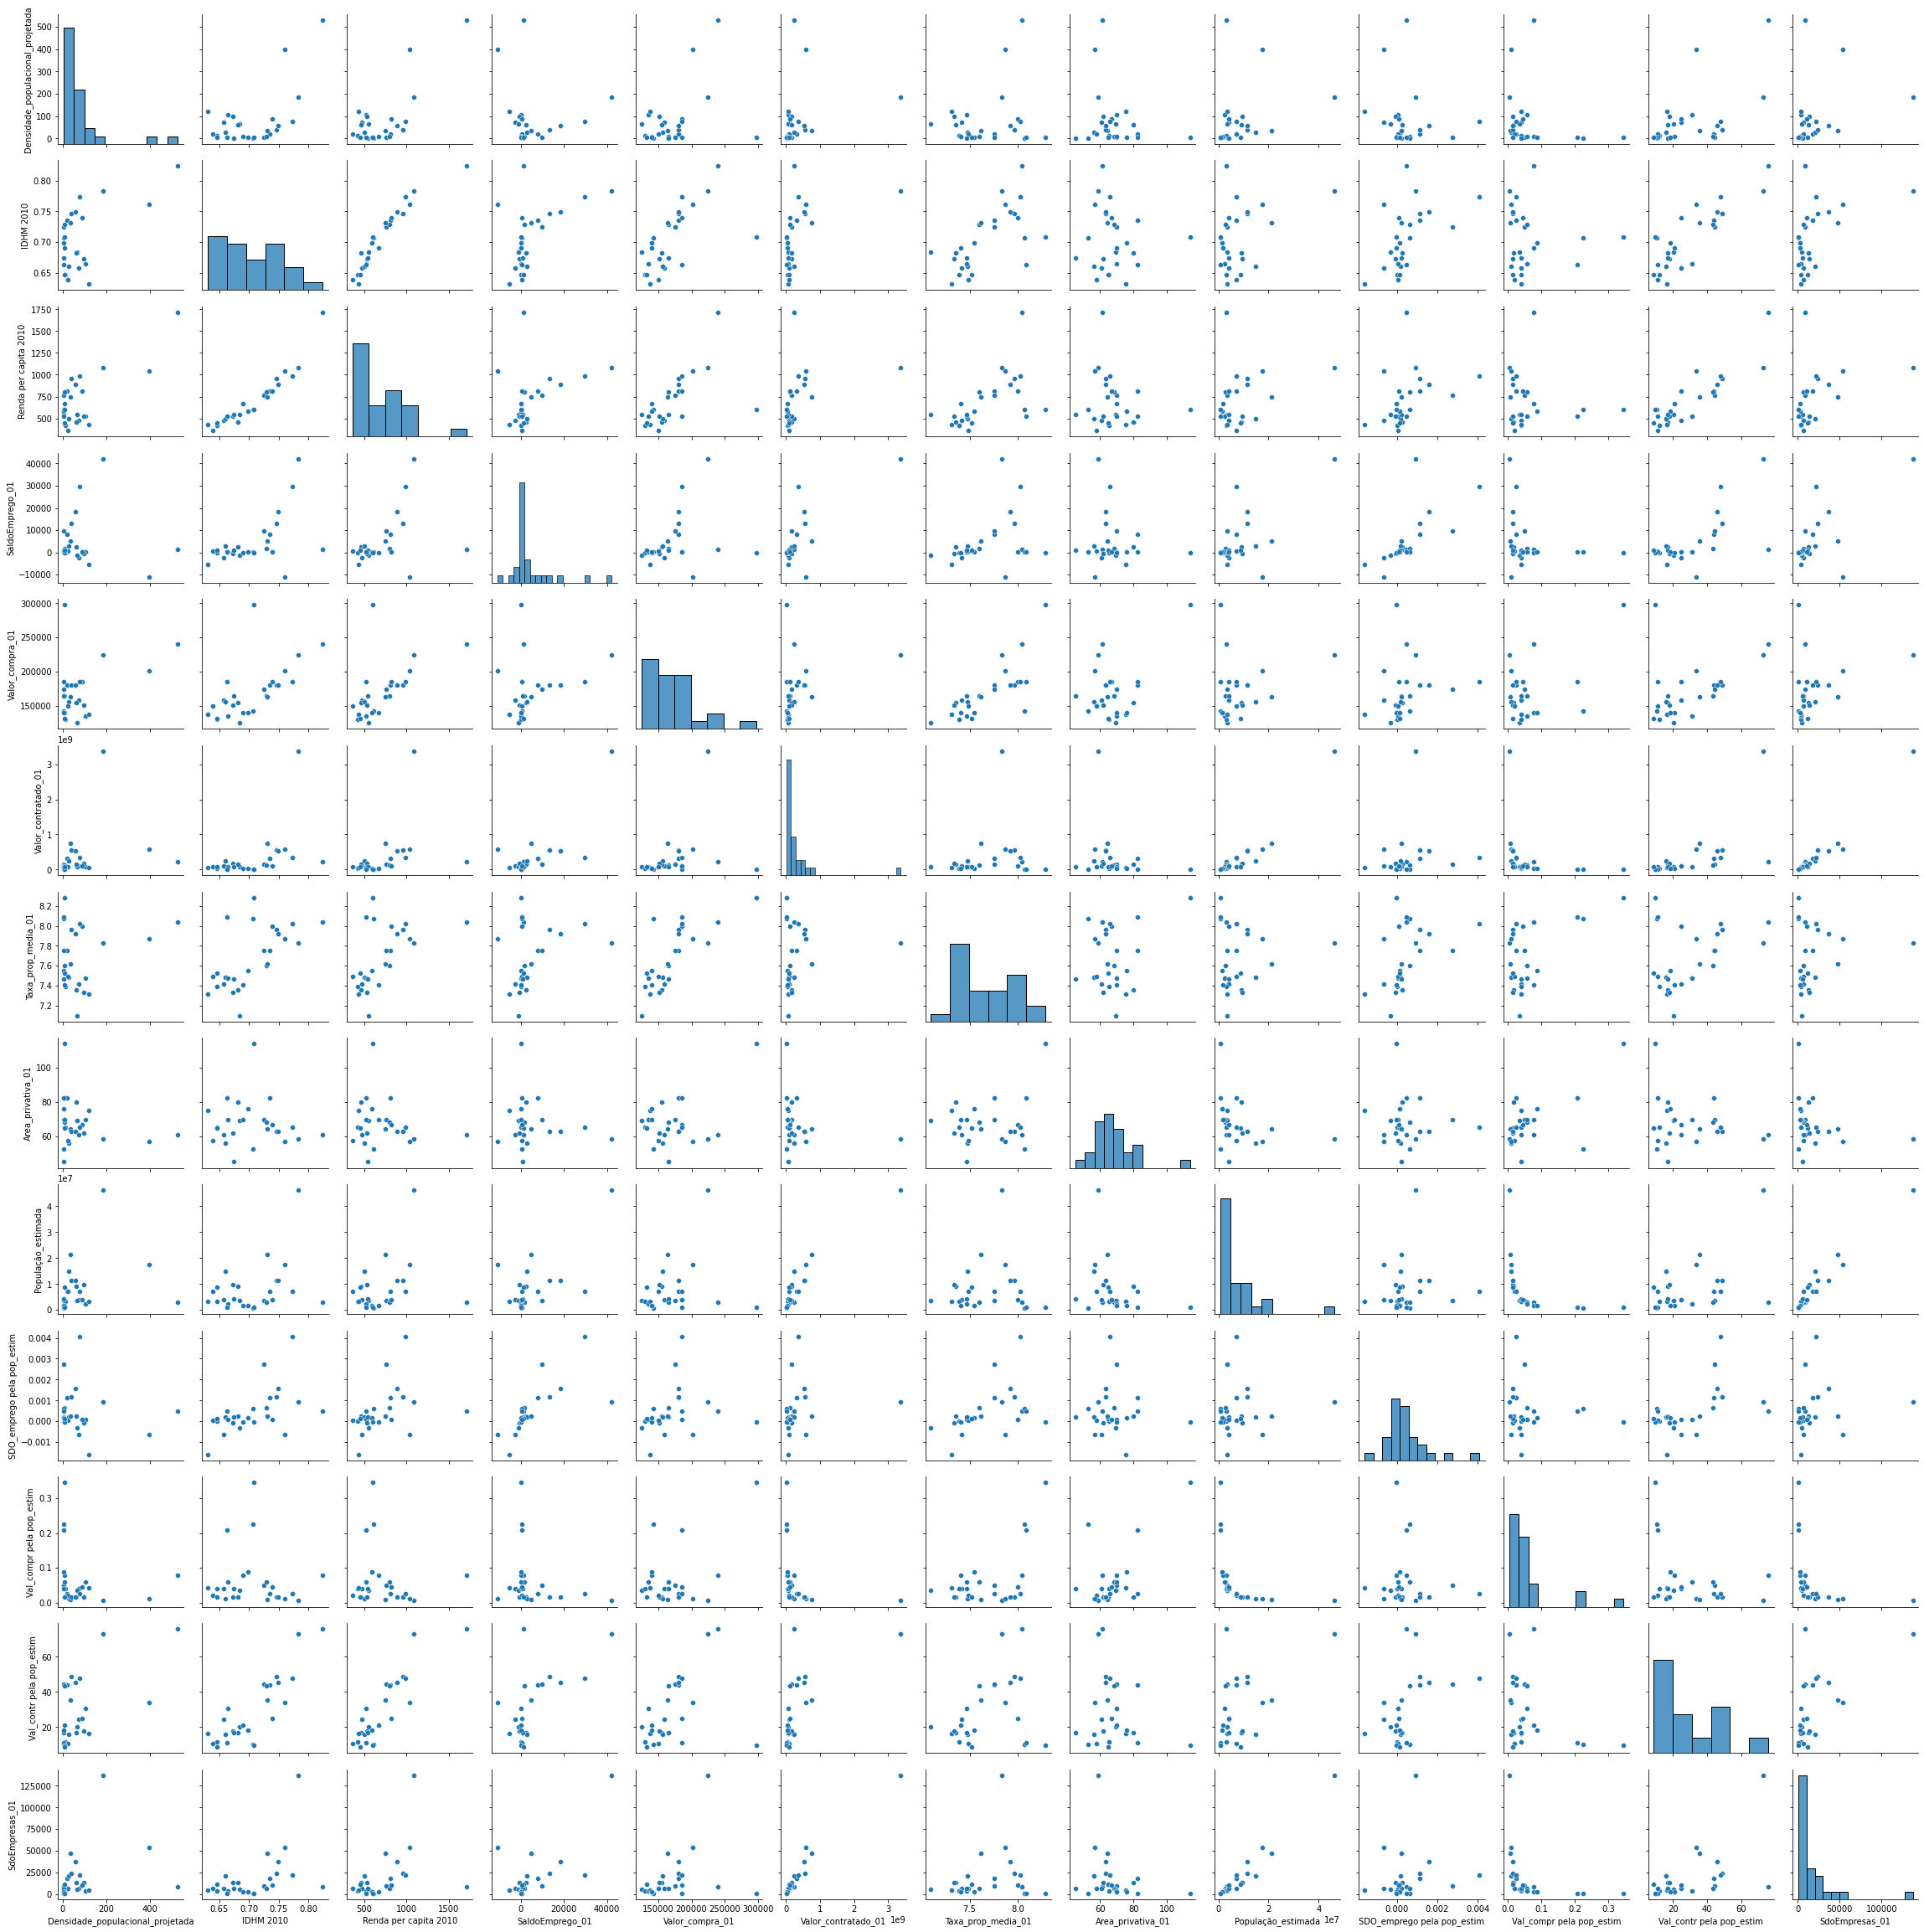

In [74]:
sns.pairplot(df_jan.iloc[:,2:])

plt.show()

In [75]:
df_dez = pd.read_csv('dataset/novo/UF_mercado_imobiliario_dez vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_dez.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_12,casosAcumulado_12,Valor_compra_12,Valor_contratado_12,Taxa_prop_media_12,Area_privativa_12,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_12
CD_UF,,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,-1023.0,251701,239597.96,6.314860e+08,7.639863,59.85,3055149,-0.000335,0.078424,206.695655,38649.0
52,GO,Goiás,20.907243,0.735,810.97,-1208.0,308868,150000.00,6.799661e+08,7.355904,76.12,7113540,-0.000170,0.021087,95.587583,77671.0
51,MT,Mato Grosso,3.904110,0.725,762.52,-4203.0,179427,190000.00,3.166171e+08,7.411909,69.22,3526220,-0.001192,0.053882,89.789373,39731.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,-2466.0,133761,160000.00,2.459794e+08,7.545629,60.54,2809394,-0.000878,0.056952,87.556024,30206.0
25,PB,Paraíba,71.533102,0.658,474.94,1185.0,166484,130000.00,2.010239e+08,6.682909,52.65,4039277,0.000293,0.032184,49.767302,27561.0


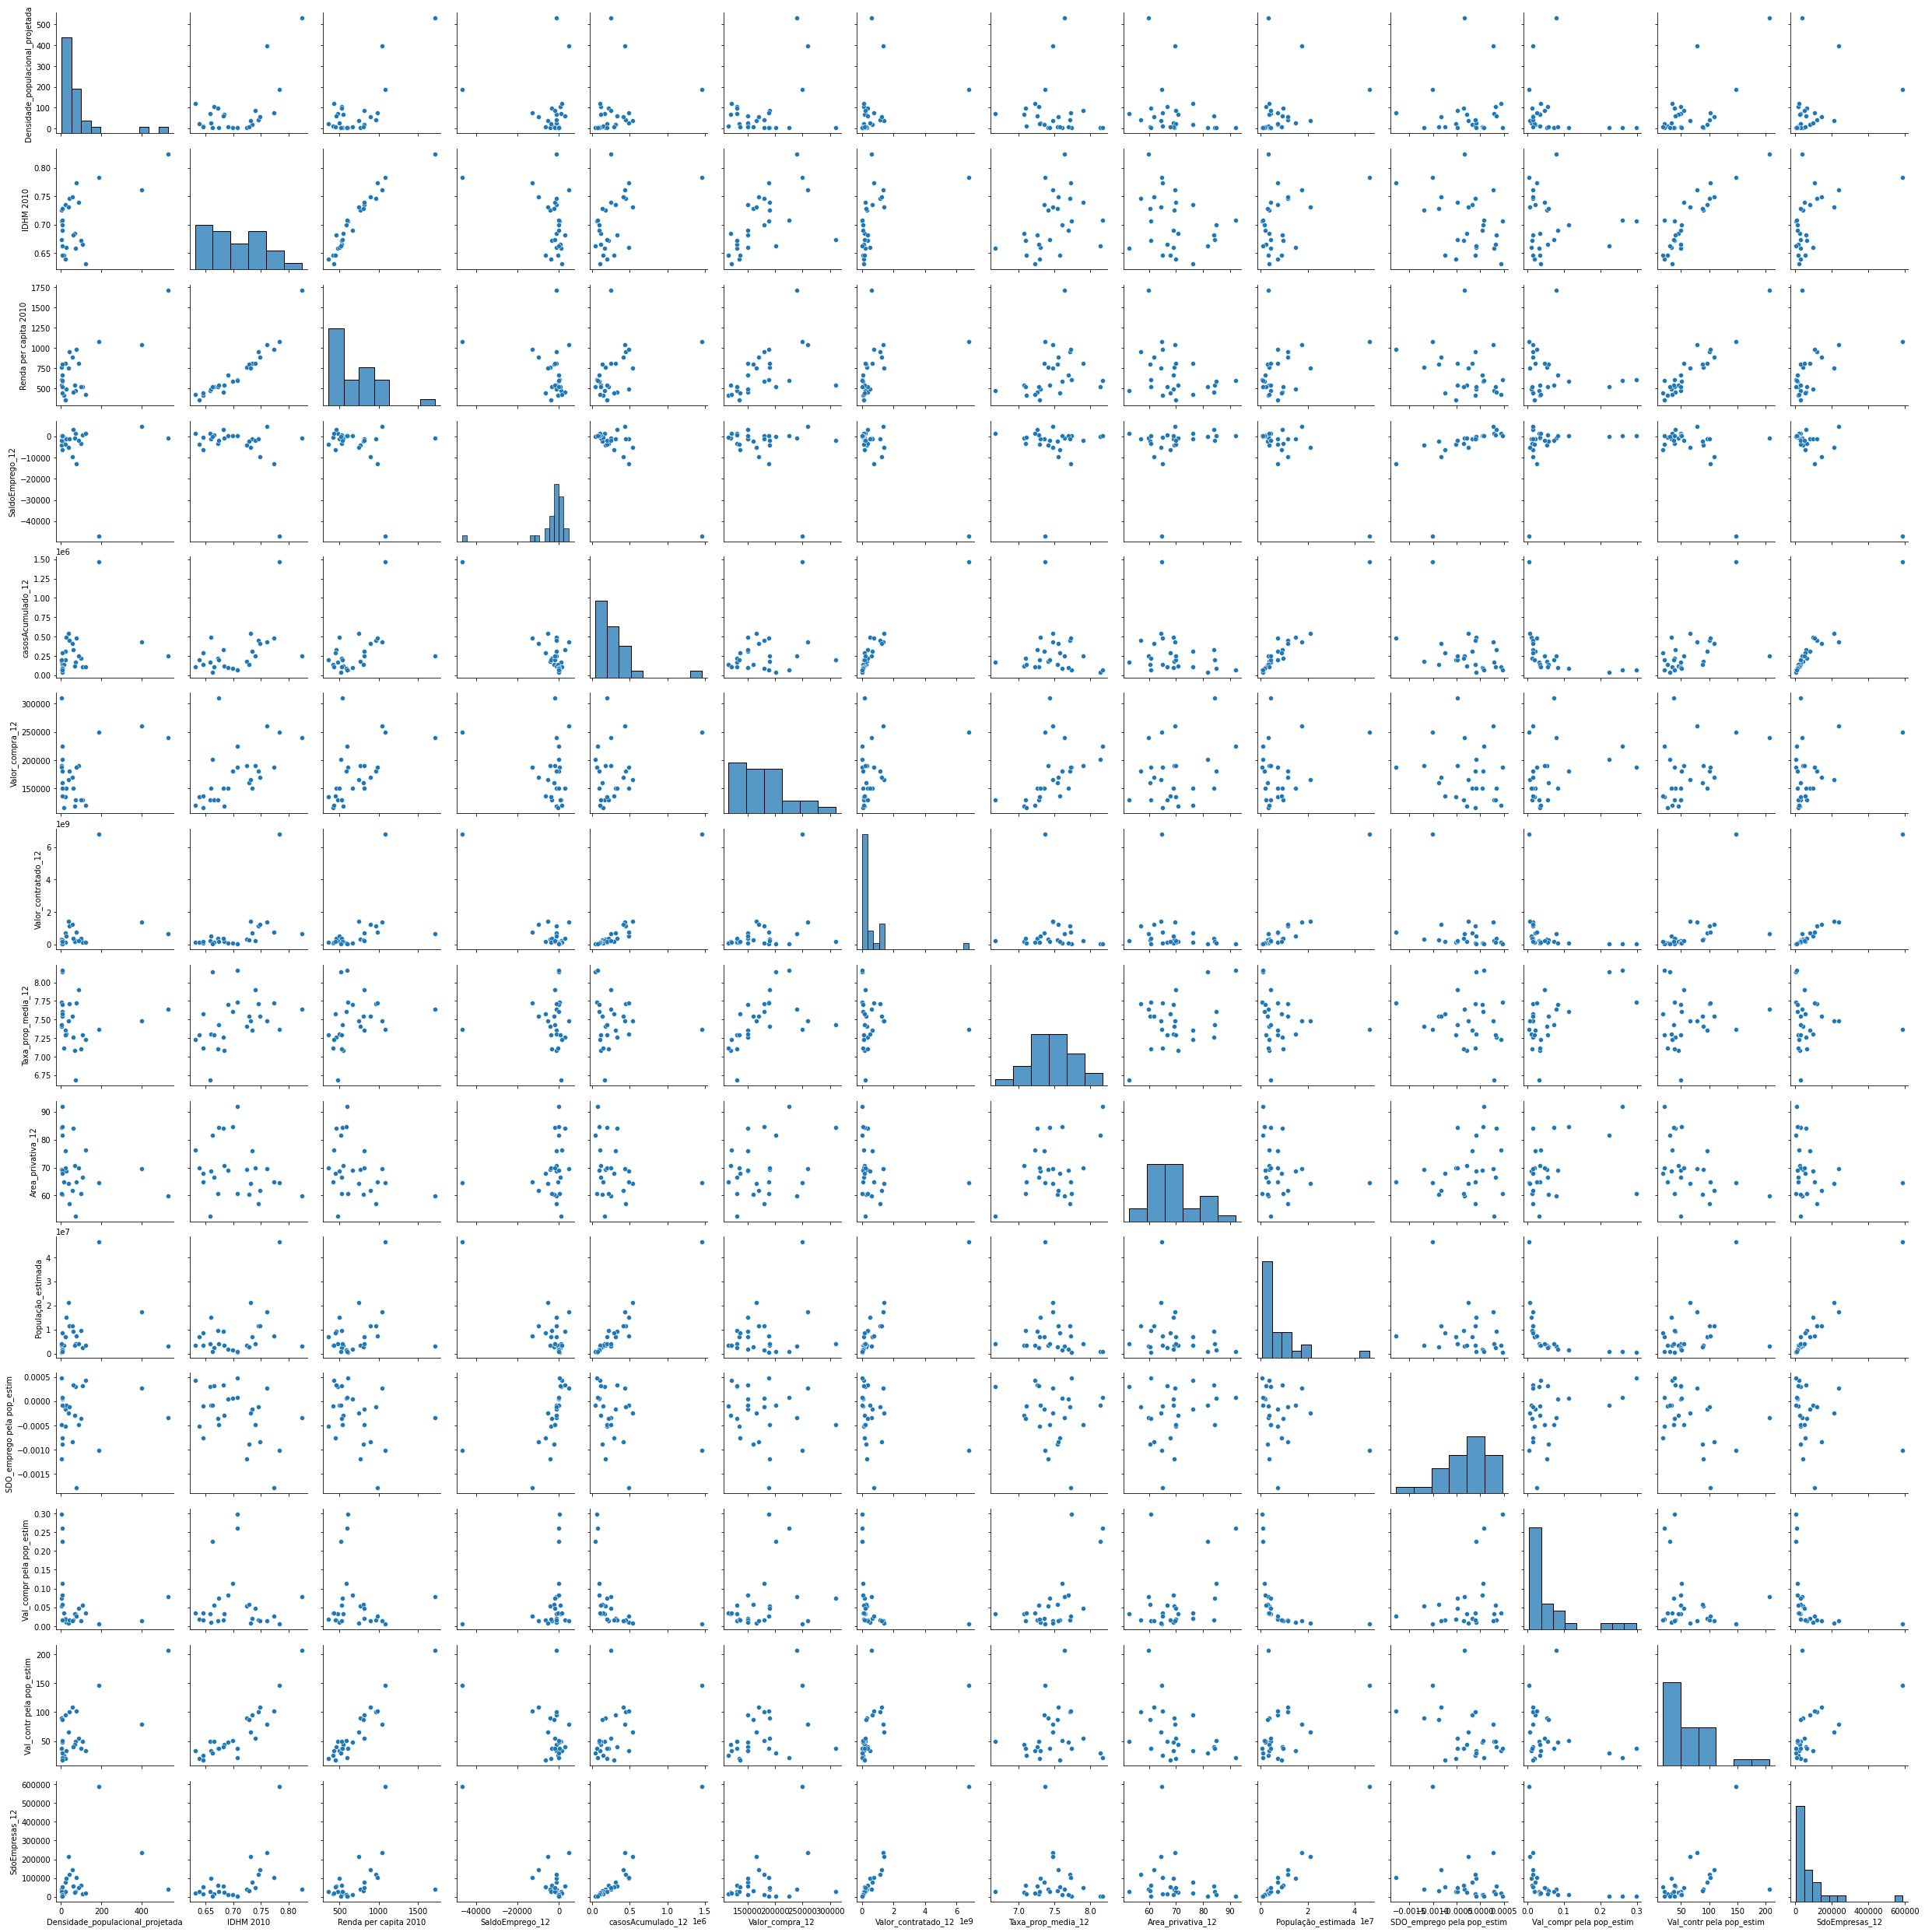

In [76]:
sns.pairplot(df_dez.iloc[:,2:])

plt.show()

In [77]:
df_var = pd.read_csv('dataset/novo/UF_mercado_imobiliario_var vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_var.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_var,casosAcumulado_12,Valor_compra_var,Valor_contratado_var,Taxa_prop_media_var,Area_privativa_var,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_var
CD_UF,,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,-2480.0,251701,-402.04,4.000893e+08,-0.401995,-1.39,3055149,-0.000812,-0.000132,130.955752,29921.0
52,GO,Goiás,20.907243,0.735,810.97,-9289.0,308868,-30000.00,3.685401e+08,-0.398489,-6.50,7113540,-0.001306,-0.004217,51.808258,60071.0
51,MT,Mato Grosso,3.904110,0.725,762.52,-13899.0,179427,15000.00,1.600231e+08,-0.343558,-0.78,3526220,-0.003942,0.004254,45.380904,30849.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,-4320.0,133761,-5000.00,1.237608e+08,-0.056017,-7.78,2809394,-0.001538,-0.001780,44.052476,23441.0
25,PB,Paraíba,71.533102,0.658,474.94,3712.0,166484,-28540.50,1.021812e+08,-0.730176,-8.35,4039277,0.000919,-0.007066,25.296902,21000.0


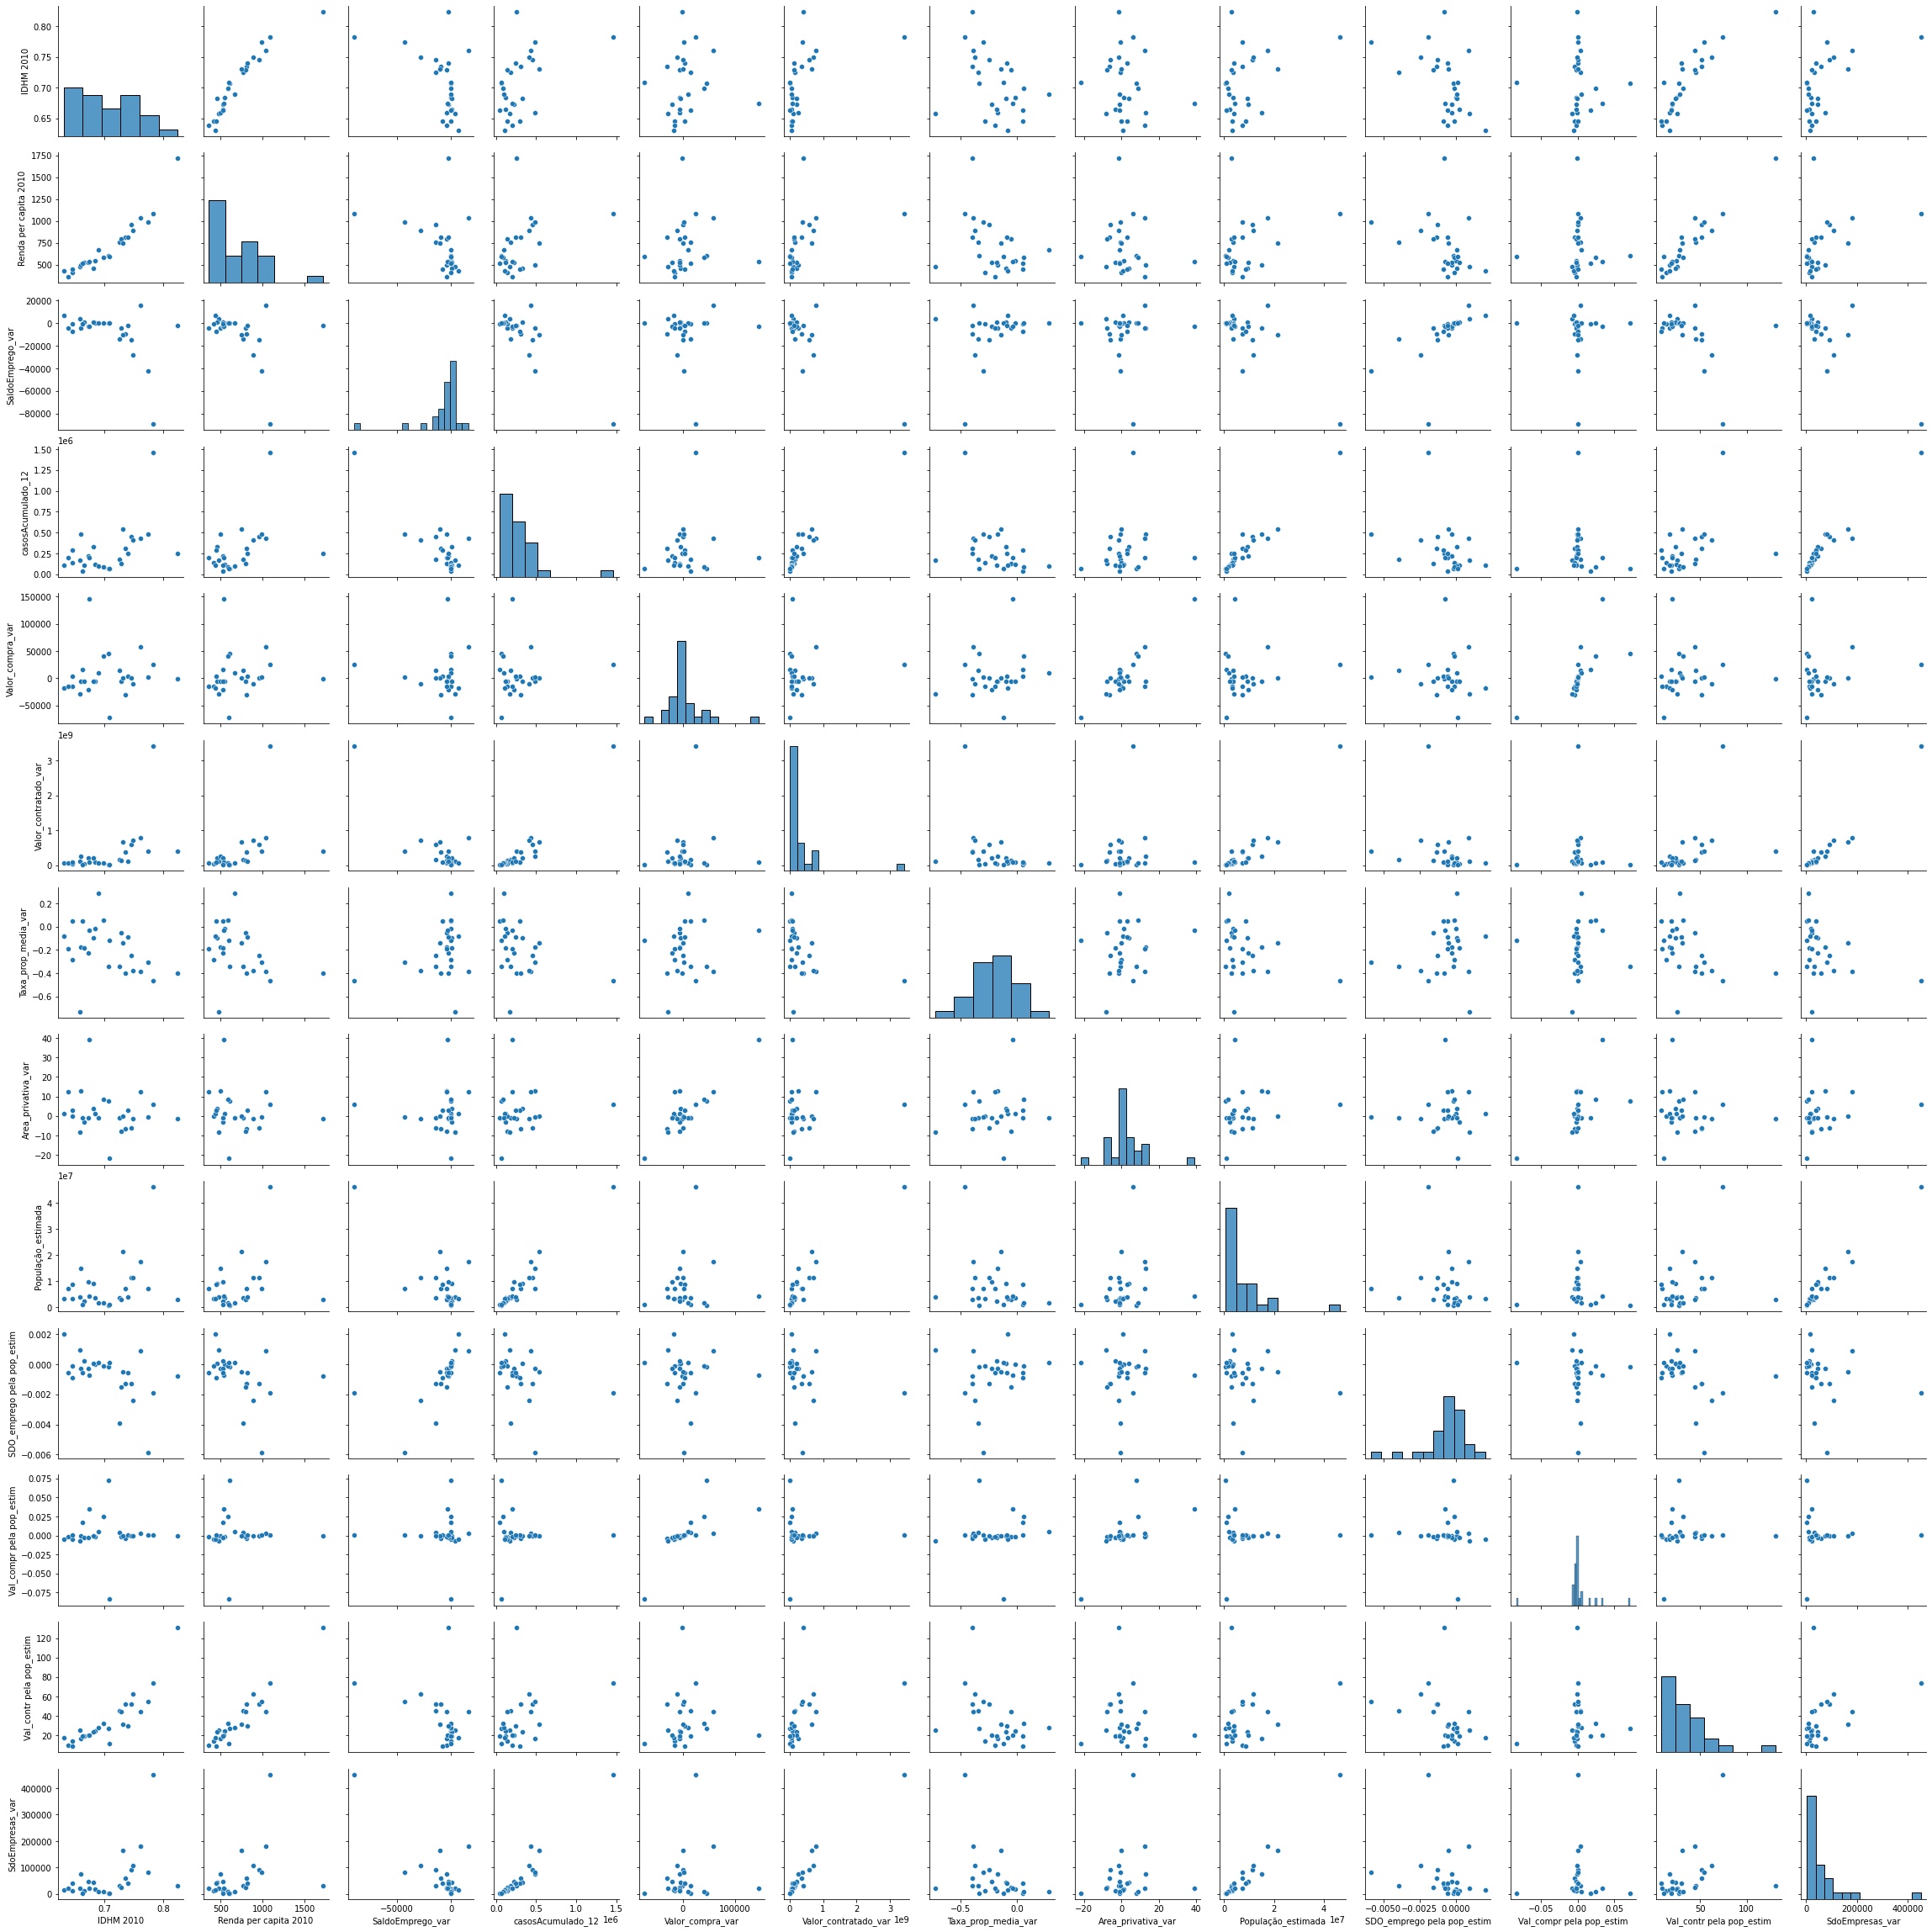

In [78]:
sns.pairplot(df_var.iloc[:,3:])

plt.show()

In [79]:
df = df_var

# Modificar para variação relativa
# df['Variacao_preco'] = (df_dez['Preco_dez_2020'] / df_jan['Preco_jan_2020']) - 1

df.head()

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_var,casosAcumulado_12,Valor_compra_var,Valor_contratado_var,Taxa_prop_media_var,Area_privativa_var,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_var
CD_UF,,,,,,,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,-2480.0,251701,-402.04,4.000893e+08,-0.401995,-1.39,3055149,-0.000812,-0.000132,130.955752,29921.0
52,GO,Goiás,20.907243,0.735,810.97,-9289.0,308868,-30000.00,3.685401e+08,-0.398489,-6.50,7113540,-0.001306,-0.004217,51.808258,60071.0
51,MT,Mato Grosso,3.904110,0.725,762.52,-13899.0,179427,15000.00,1.600231e+08,-0.343558,-0.78,3526220,-0.003942,0.004254,45.380904,30849.0
50,MS,Mato Grosso do Sul,7.866190,0.729,799.34,-4320.0,133761,-5000.00,1.237608e+08,-0.056017,-7.78,2809394,-0.001538,-0.001780,44.052476,23441.0
25,PB,Paraíba,71.533102,0.658,474.94,3712.0,166484,-28540.50,1.021812e+08,-0.730176,-8.35,4039277,0.000919,-0.007066,25.296902,21000.0


### Carregas Municpios Espacial

In [80]:
# muncipios = pd.read_pickle('bases-gdrive/Dados Processados/municipios.pkl')

# estados = gpd.read_file('bases-gdrive/Shapefile/Estados/UFEBRASIL.shp', index_col = 0)

estados = gpd.read_file('BR_UF_2020/BR_UF_2020.shp')

#estados = estados.set_index('ID')

# siglas = [
#     'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB',
#     'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS',
#     'MT', 'GO', 'DF'
# ]

# estados['UF'] = siglas

estados.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


### Juntar Dados

In [81]:
esp_df = pd.merge(
    left = estados,
    right = df,
    left_on = 'SIGLA_UF',
    right_on = 'UF',
    how = 'right'
)

print(esp_df.shape)
esp_df.head()

(27, 21)


,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,...,casosAcumulado_12,Valor_compra_var,Valor_contratado_var,Taxa_prop_media_var,Area_privativa_var,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_var
0,53,Distrito Federal,DF,Centro-oeste,"POLYGON ((-47.41734 -15.54655, -47.41720 -15.5...",DF,Distrito Federal,530.335628,0.824,1715.11,...,251701,-402.04,4.000893e+08,-0.401995,-1.39,3055149,-0.000812,-0.000132,130.955752,29921.0
1,52,Goiás,GO,Centro-oeste,"POLYGON ((-52.36102 -16.08160, -52.36040 -16.0...",GO,Goiás,20.907243,0.735,810.97,...,308868,-30000.00,3.685401e+08,-0.398489,-6.50,7113540,-0.001306,-0.004217,51.808258,60071.0
2,51,Mato Grosso,MT,Centro-oeste,"POLYGON ((-61.54023 -10.00021, -61.54014 -9.99...",MT,Mato Grosso,3.904110,0.725,762.52,...,179427,15000.00,1.600231e+08,-0.343558,-0.78,3526220,-0.003942,0.004254,45.380904,30849.0
3,50,Mato Grosso do Sul,MS,Centro-oeste,"POLYGON ((-57.83371 -20.93628, -57.83553 -20.9...",MS,Mato Grosso do Sul,7.866190,0.729,799.34,...,133761,-5000.00,1.237608e+08,-0.056017,-7.78,2809394,-0.001538,-0.001780,44.052476,23441.0
4,25,Paraíba,PB,Nordeste,"MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ...",PB,Paraíba,71.533102,0.658,474.94,...,166484,-28540.50,1.021812e+08,-0.730176,-8.35,4039277,0.000919,-0.007066,25.296902,21000.0


In [ ]:
esp_df.to_file('Shapefiles/Estado-Var')

### Selecionar dados para modelos

In [87]:
target = 'Valor_compra_var'

x = df.iloc[:,2:].drop([target], axis = 1)

labels = x.columns

y = df[target]

x_y = pd.merge(x, y, left_index=True, right_index=True)

x.head()

,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_var,casosAcumulado_12,Valor_contratado_var,Taxa_prop_media_var,Area_privativa_var,População_estimada,SDO_emprego pela pop_estim,Val_compr pela pop_estim,Val_contr pela pop_estim,SdoEmpresas_var
CD_UF,,,,,,,,,,,,,
53,530.335628,0.824,1715.11,-2480.0,251701,4.000893e+08,-0.401995,-1.39,3055149,-0.000812,-0.000132,130.955752,29921.0
52,20.907243,0.735,810.97,-9289.0,308868,3.685401e+08,-0.398489,-6.50,7113540,-0.001306,-0.004217,51.808258,60071.0
51,3.904110,0.725,762.52,-13899.0,179427,1.600231e+08,-0.343558,-0.78,3526220,-0.003942,0.004254,45.380904,30849.0
50,7.866190,0.729,799.34,-4320.0,133761,1.237608e+08,-0.056017,-7.78,2809394,-0.001538,-0.001780,44.052476,23441.0
25,71.533102,0.658,474.94,3712.0,166484,1.021812e+08,-0.730176,-8.35,4039277,0.000919,-0.007066,25.296902,21000.0


### Correlações

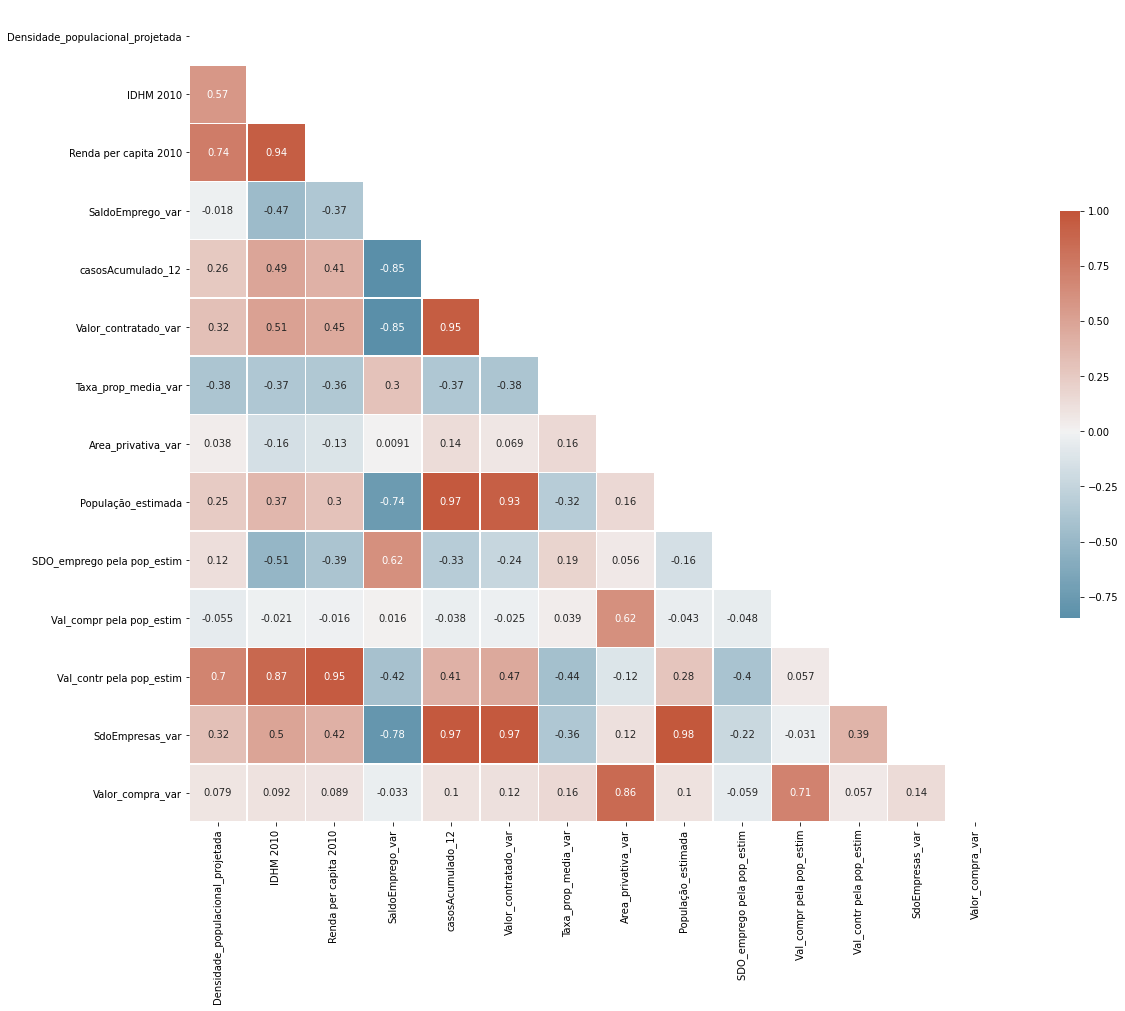

In [88]:
scripts.corr(x_y, figsize = (20,15))

### PPS index

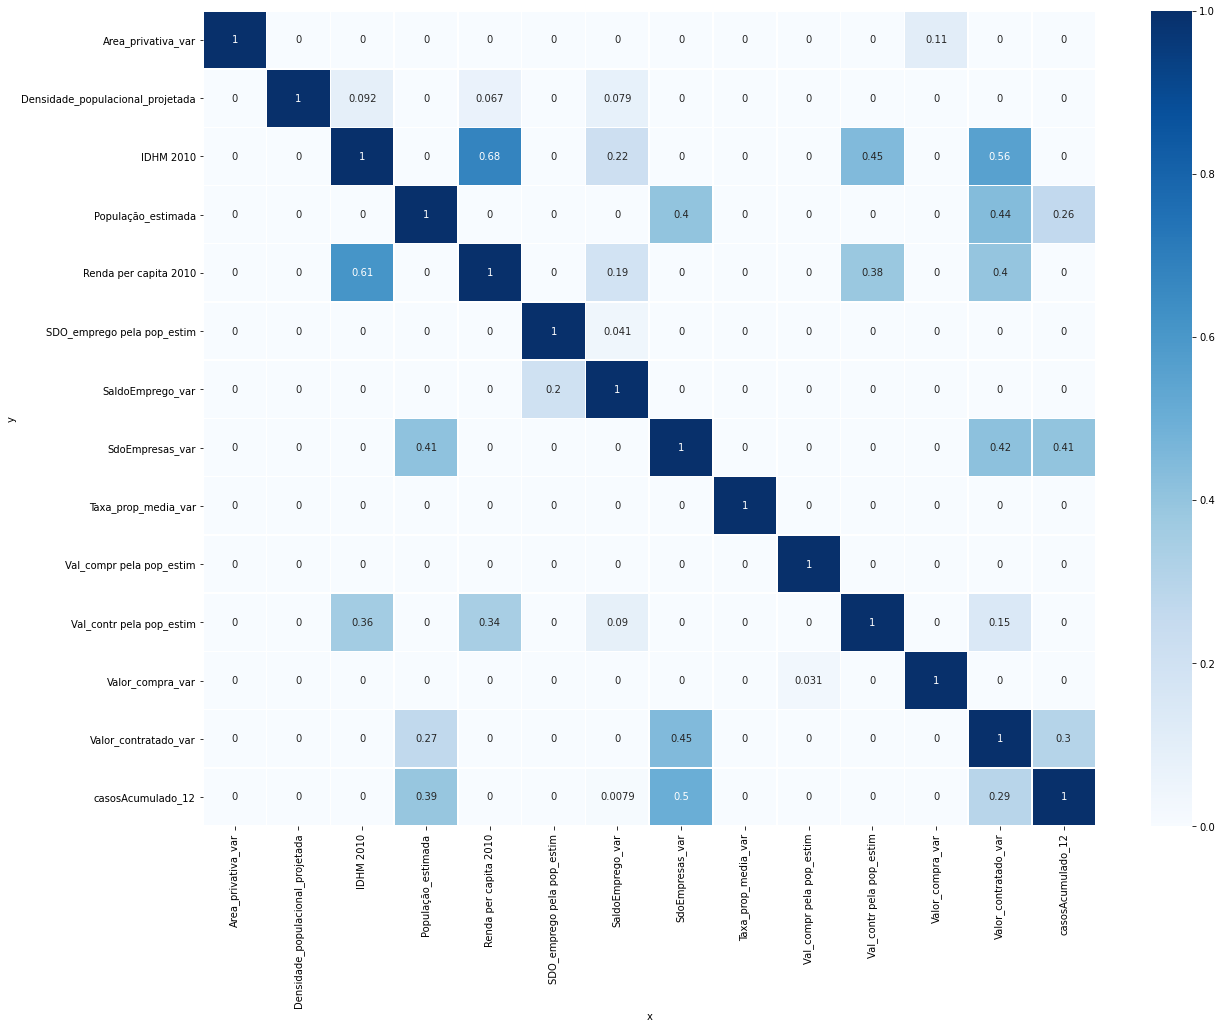

In [89]:
plt.figure(figsize=(20, 15))

matrix_df = pps.matrix(x_y)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

### Remoção de Variáveis com alta correlação

In [90]:
# drop_labels = [
#     'SaldoEmprego_12', 'Var_SaldoEmprego', 'casosNovos_03', 'obitosAcumulado_03', 'EmpFechadas_03',
#     'obitosNovos_03', 'Var_CasosAcumulados', 'obitosAcumulado_12', 'Var_EmpFechadas', 'casosAcumulado_12',
#     'EmpFechadas_12', 'obitosNovos_12', 'Perc_EnsinoSuper_2010' #'Var_CasosAcumulados.1', #'Capital',
#     #'casosNovos_12'
# ]


# x = x.drop(axis = 1, 
#            labels = drop_labels
#           )

# labels = x.columns

# y = df['Variacao_preco']

# x_y = pd.merge(x, y, left_index=True, right_index=True)


# x.head()

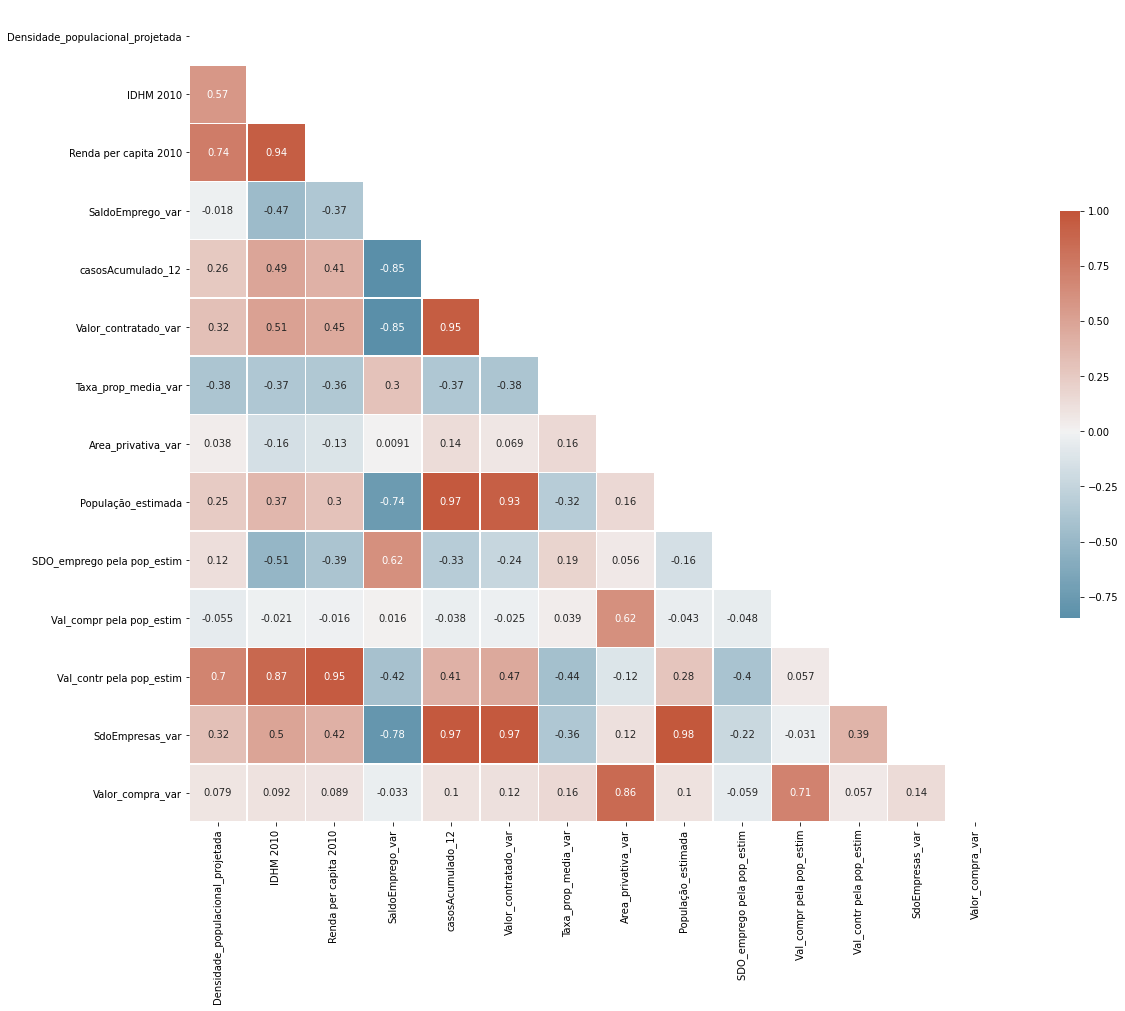

In [91]:
scripts.corr(x_y, figsize = (20,15))

In [92]:
x.skew()

Densidade_populacional_projetada    2.841520
IDHM 2010                           0.518566
Renda per capita 2010               1.810648
SaldoEmprego_var                   -3.151832
casosAcumulado_12                   3.121727
Valor_contratado_var                4.261101
Taxa_prop_media_var                -0.179603
Area_privativa_var                  1.433023
População_estimada                  2.987134
SDO_emprego pela pop_estim         -1.692141
Val_compr pela pop_estim           -0.735022
Val_contr pela pop_estim            2.230846
SdoEmpresas_var                     3.403811
dtype: float64

In [1102]:
for s, i in zip(x.skew(), x.columns):
    if s > 2.5:
        x[i] = np.log(x[i] + 1)

In [1103]:
x.skew()

Densidade_populacional_projetada    0.156084
IDHM 2010                           0.518566
Renda per capita 2010               1.810648
SaldoEmprego_01                     2.260712
Valor_contratado_01                -0.018578
Taxa_prop_media_01                  0.233647
dtype: float64

In [1104]:
x.kurtosis()

Densidade_populacional_projetada   -0.904168
IDHM 2010                          -0.315782
Renda per capita 2010               4.674524
SaldoEmprego_01                     5.907550
Valor_contratado_01                 0.374731
Taxa_prop_media_01                 -0.922510
dtype: float64

### Realizar Normalização

In [93]:
x_norm = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns, index = x.index)

x_y_norm = pd.DataFrame(StandardScaler().fit_transform(x_y), columns = x_y.columns, index = x_y.index)

### Regressão Linear

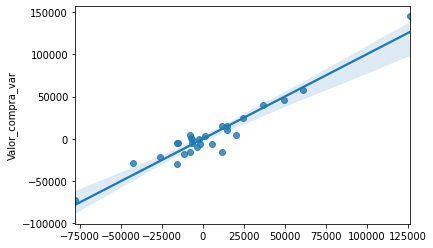

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Valor_compra_var   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     13.04
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           2.19e-05
Time:                        15:16:14   Log-Likelihood:                -286.71
No. Observations:                  27   AIC:                             601.4
Df Residuals:                      13   BIC:                             619.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             4827.0944   2744.720      1.759      0.102   -1102.512    1.08e+04
Densidade_populacional_projetada -1.154e+04   7453.331     -1.548      0.146   -2.76e+04    4562.894
IDHM 2010                        -8330.1012   1.33e+04     -0.625      0.543   -3.71e+04    2.05e+04
Renda per capita 2010             2.806e+04    2.1e+04      1.338      0.204   -1.73e+04    7.34e+04
SaldoEmprego_var                  1.735e+04   1.81e+04      0.959      0.355   -2.17e+04    5.64e+04
casosAcumulado_12                -7878.7202   2.26e+04     -0.348      0.733   -5.68e+04     4.1e+04
Valor_contratado_var              2.513e+04   3.11e+04      0.808      0.434   -4.21e+04    9.23e+04
Taxa_prop_media_var               1503.1542   3881.102      0.387      0.705   -6881.456    9887.765
Area_privativa_var                3.017e+04   4642.605      6.498      0.000    2.01e+04    4.02e+04
População_estimada               -4.196e+04   2.84e+04     -1.477      0.163   -1.03e+05    1.94e+04
SDO_emprego pela pop_estim       -6255.7883   8852.168     -0.707      0.492   -2.54e+04    1.29e+04
Val_compr pela pop_estim          6903.6554   4239.352      1.628      0.127   -2254.907    1.61e+04
Val_contr pela pop_estim         -1.281e+04   1.53e+04     -0.838      0.417   -4.59e+04    2.02e+04
SdoEmpresas_var                   3.989e+04   3.87e+04      1.030      0.322   -4.38e+04    1.24e+05
==============================================================================
Omnibus:                        2.816   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.245   Jarque-Bera (JB):                1.565
Skew:                          -0.556   Prob(JB):                        0.457
Kurtosis:                       3.395   Cond. No.                         47.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
lm = sm.OLS(endog = y, exog = add_constant(x_norm))

r = lm.fit()

sns.regplot(x = r.predict(add_constant(x_norm)), y = y)

plt.show()

r.summary()

#### Stepwise Critério AIC

In [95]:
drop, aic_remaing, labels_remaining = scripts.iterate_aic(x_norm, y)

drop

['Area_privativa_var',
 'Val_compr pela pop_estim',
 'Taxa_prop_media_var',
 'SaldoEmprego_var',
 'SdoEmpresas_var']

#### Cross Validation

Results
MSE: 910651933.040
RMSE: 30177.010
MAE: 20007.125
R2: 0.338


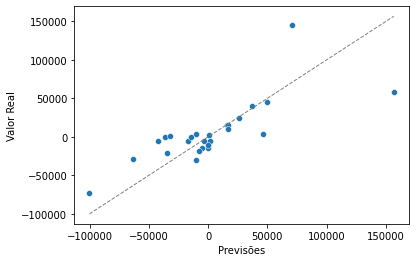

In [96]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, LinearRegression(), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

### PCA

In [97]:
pca = PCA(n_components = 2)

pca_coord = pca.fit_transform(x_y_norm)

### KMeans

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

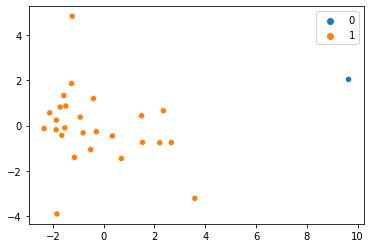

In [98]:
kmeans = KMeans(n_clusters = 2).fit_transform(x_y_norm)

sns.scatterplot(pca_coord[:,0], pca_coord[:,1], hue = kmeans.argmax(axis = 1), )

In [99]:
pd.DataFrame({'Cidade': df['UF'], 'Cluster': kmeans.argmax(axis = 1)}).sort_values(by = 'Cluster')

,Cidade,Cluster
CD_UF,,
35,SP,0
53,DF,1
43,RS,1
31,MG,1
32,ES,1
33,RJ,1
15,PA,1
16,AP,1
17,TO,1


##### Outlier

In [1114]:
df[pca_coord[:,0] > 5]

,UF,Nome_UF,Densidade_populacional_projetada,IDHM 2010,Renda per capita 2010,SaldoEmprego_01,Valor_compra_01,Valor_contratado_01,Taxa_prop_media_01,Area_privativa_01
CD_UF,,,,,,,,,,
53,DF,Distrito Federal,530.335628,0.824,1715.11,1457.0,240000.0,2.313967e+08,8.041858,61.24
35,SP,São Paulo,186.485496,0.783,1084.46,42161.0,225000.0,3.373485e+09,7.831801,58.69


Removendo Outliers

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


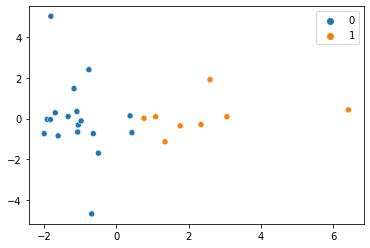

,Cidade,Cluster
CD_UF,,
21,MA,0
17,TO,0
11,RO,0
12,AC,0
13,AM,0
14,RR,0
32,ES,0
26,PE,0
27,AL,0


In [100]:
slicer = pca_coord[:,0] < 5

pca = PCA(n_components = 2)

pca_coord_new = pca.fit_transform(x_y_norm.values[slicer])

kmeans_new = KMeans(n_clusters = 2).fit_transform(x_y_norm.values[slicer])

sns.scatterplot(pca_coord_new[:,0], pca_coord_new[:,1], hue = kmeans_new.argmax(axis = 1), )

plt.show()

pd.DataFrame({'Cidade': df['UF'][slicer], 'Cluster': kmeans_new.argmax(axis = 1)}).sort_values(by = 'Cluster')

### Cluster Dendograma

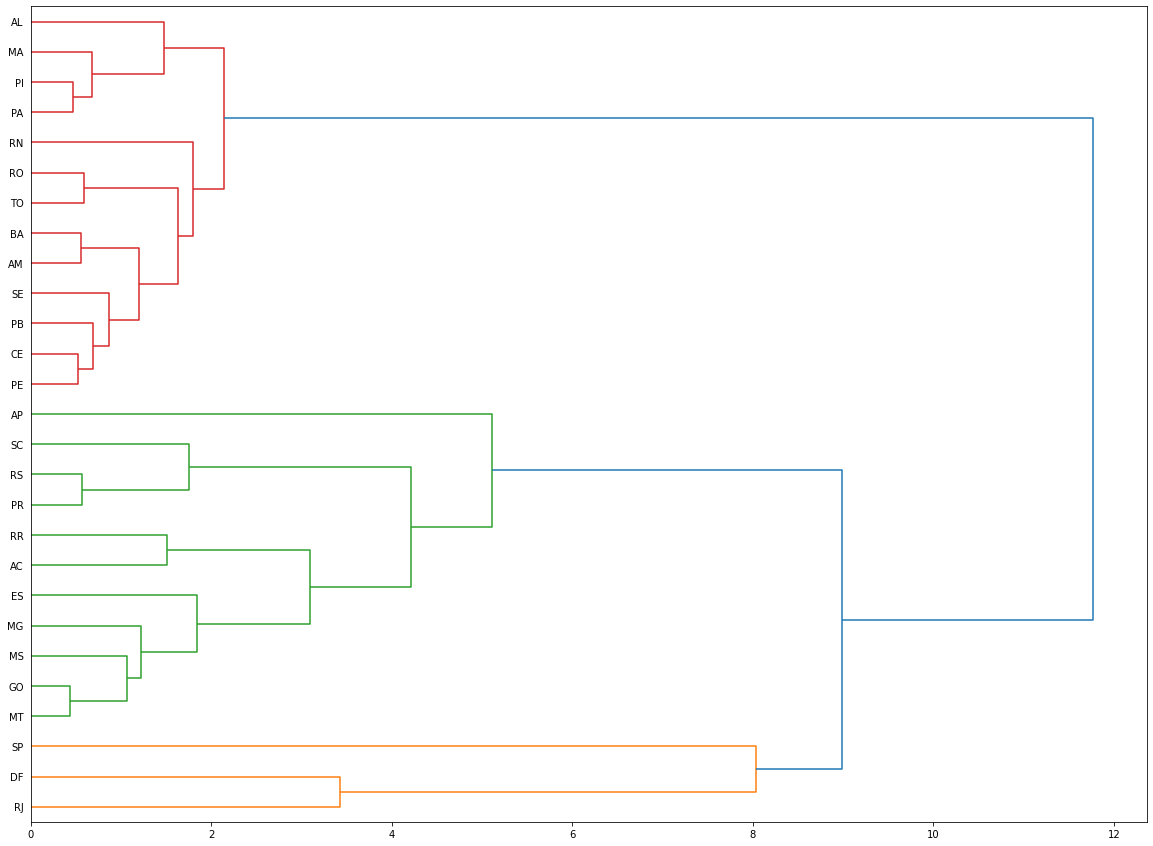

In [1121]:
linked = linkage(x_y_norm.values, 'ward')

plt.figure(figsize=(20, 15))
dendrogram(
            linked,
            orientation='right',
            labels=df['UF'].values,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

### Regressão Espacial

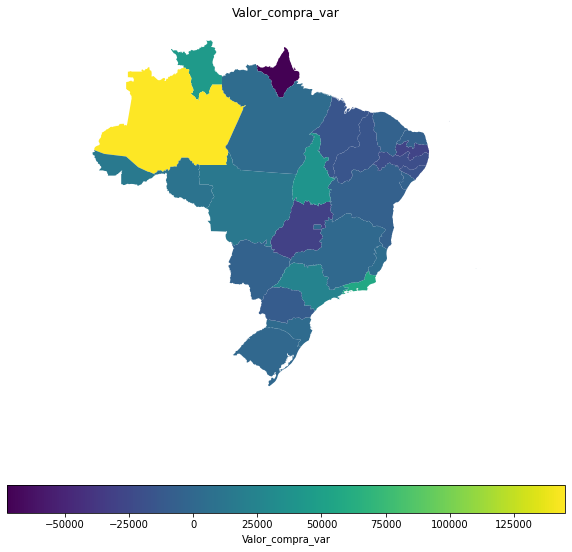

In [101]:
ax = esp_df.plot(
    column = target,
    figsize = (10,10),
    legend = True,
    legend_kwds = {'label': target, 'orientation': "horizontal"},
)

ax.set_title(target)

ax.set_axis_off()

In [102]:
esp_df.shape

(27, 21)

In [103]:
w = libpysal.weights.Rook.from_dataframe(esp_df, )

# w = libpysal.weights.Queen.from_dataframe(esp_df, )

w.transform = 'r'

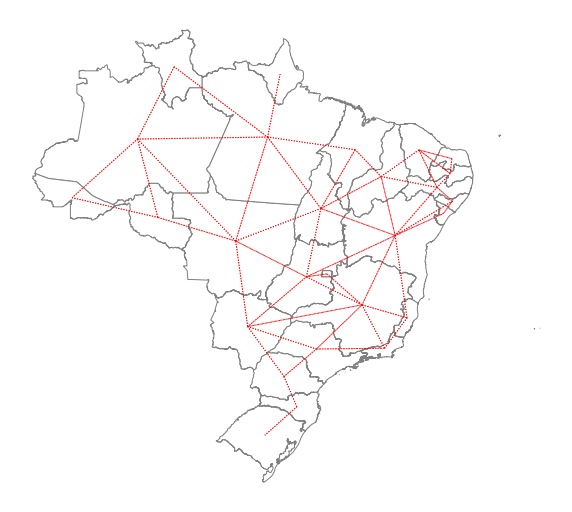

In [104]:
warnings.filterwarnings('ignore', module = 'libpysal')

ax = esp_df.plot(edgecolor='grey', facecolor='w',figsize=(10,10) )

f, ax = w.plot(esp_df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''),
              )

ax.set_axis_off()

In [105]:
moran_I = {}
moran = {}
moran_local = {}

for i in x_y_norm.columns:
    
    moran[i] = esda.Moran(x_y_norm[i].values, w)
    moran_local[i] = esda.moran.Moran_Local(x_y_norm[i].values, w)
    moran_I[i] = moran[i].I

In [106]:
(pd.Series(moran_I)
     .rename('Moran I')
     .sort_values(ascending = False)
     .to_frame()
)

,Moran I
IDHM 2010,0.596181
Renda per capita 2010,0.453059
Val_contr pela pop_estim,0.368495
SDO_emprego pela pop_estim,0.326726
SdoEmpresas_var,0.315792
Valor_contratado_var,0.220787
Valor_compra_var,0.219076
casosAcumulado_12,0.194534
População_estimada,0.192211
Val_compr pela pop_estim,0.152466


IDHM 2010


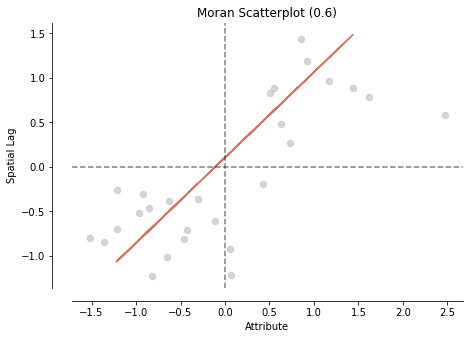

Renda per capita 2010


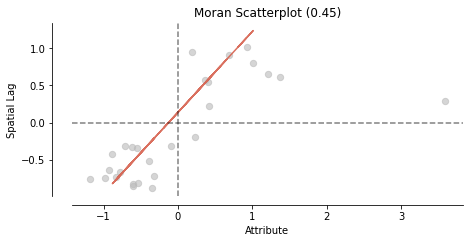

Val_contr pela pop_estim


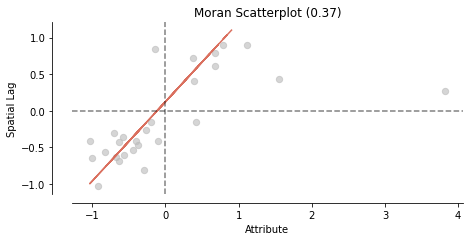

SDO_emprego pela pop_estim


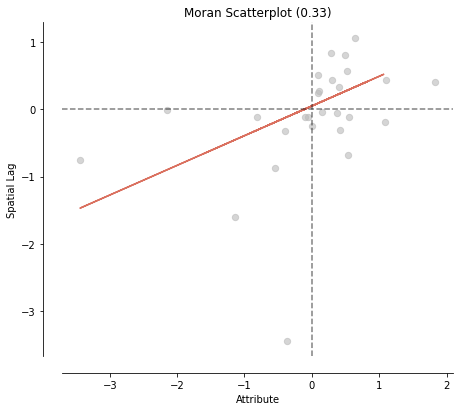

In [107]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])
    moran_scatterplot(moran[i[0]], aspect_equal=True)
    plt.show()

IDHM 2010


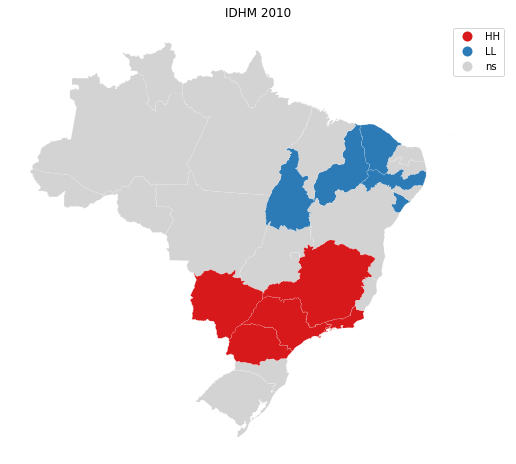

Renda per capita 2010


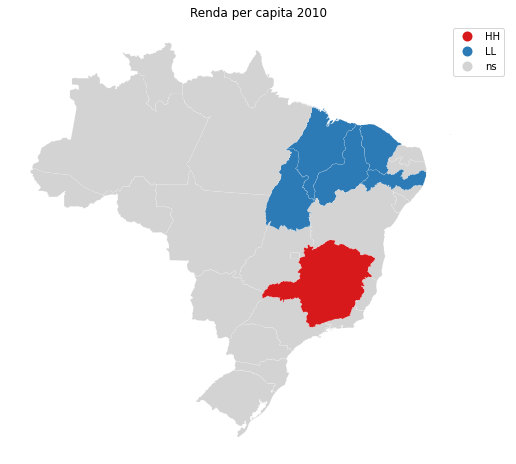

Val_contr pela pop_estim


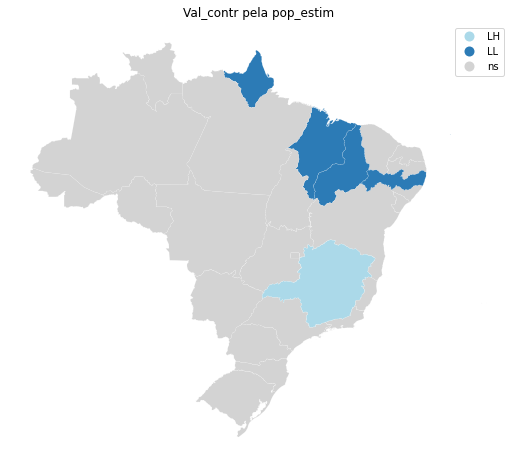

SDO_emprego pela pop_estim


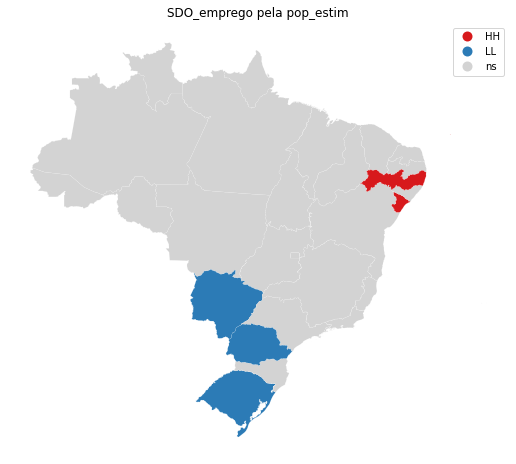

In [108]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])

    fig, ax = lisa_cluster(moran_local[i[0]], esp_df, p=0.05, figsize = (9,9))
    ax.set_title(i[0])
    plt.show()

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          27
Mean dependent var  :   4827.0944                Number of Variables   :          14
S.D. dependent var  :  37783.8084                Degrees of Freedom    :          13
R-squared           :      0.9288
Adjusted R-squared  :      0.8575
Sum squared residual:2644253695.690                F-statistic           :     13.0372
Sigma-square        :203404130.438                Prob(F-statistic)     :   2.187e-05
S.E. of regression  :   14261.982                Log likelihood        :    -286.709
Sigma-square ML     :97935322.063                Akaike info criterion :     601.418
S.E of regression ML:   9896.2277                Schwarz criterion     :     619.559

--------------------------------------------------------------------------

<AxesSubplot:ylabel='Valor_compra_var'>

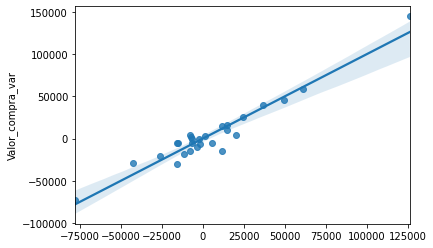

In [109]:
r = spreg.OLS(
        x = x_norm.values, name_x = list(labels),
        y = y.values, 
        w = w,
    )

print(r.summary)

sns.regplot(x = r.predy, y = y)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       preco                Number of Observations:          27
Mean dependent var  :   4827.0944                Number of Variables   :          15
S.D. dependent var  :  37783.8084                Degrees of Freedom    :          12
Pseudo R-squared    :      0.9320
Spatial Pseudo R-squared:  0.9313

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    6148.7325716    2198.8814648       2.7963002       0.0051691
Densidade_populacional_projetada    -13983.3105262    5498.4073807      -2.5431565       0.0109856
           IDHM 2010    -12459.0848278    975

<AxesSubplot:ylabel='Valor_compra_var'>

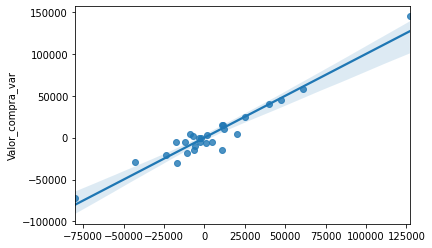

In [110]:

spatial_regression = spreg.GM_Lag(
        x = x_norm.values, name_x = list(labels),
        y = y.values, name_y = 'preco',
        w = w,
    
        
    )

print(
    spatial_regression.summary
)

sns.regplot(x = spatial_regression.predy, y = y)

### Random Forests

In [111]:
rf = RandomForestRegressor(n_estimators = 200)

rf.fit(y = y, X = x_norm)

RandomForestRegressor(n_estimators=200)

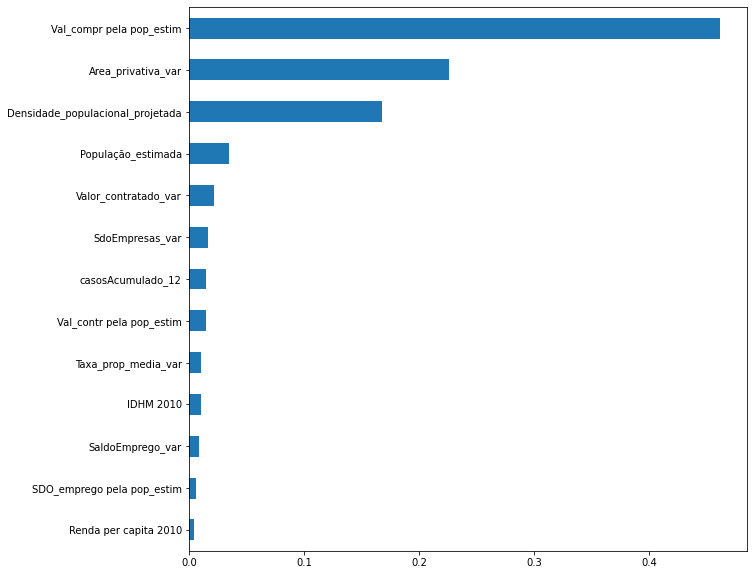

In [112]:
pd.Series(rf.feature_importances_, index = labels).sort_values().plot.barh(figsize = (10,10))

plt.show()

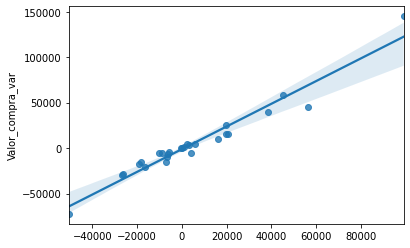

In [113]:
sns.regplot(x = rf.predict(x_norm), y = y)

plt.show()

Results
MSE: 852100178.062
RMSE: 29190.755
MAE: 17112.795
R2: 0.380


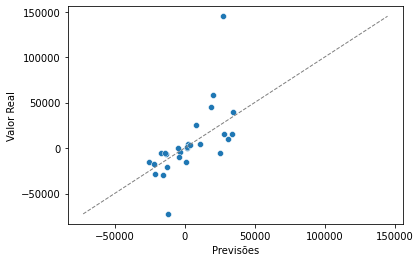

In [114]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, RandomForestRegressor(n_estimators = 50), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

#### Recursive Feature Eliminations

In [115]:
selector_rf = RFE(rf, n_features_to_select=.5, step=1)

selector_rf = selector_rf.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_rf.ranking_, index = labels).sort_values()

Best Features


Densidade_populacional_projetada    1
SaldoEmprego_var                    1
Valor_contratado_var                1
Area_privativa_var                  1
Val_compr pela pop_estim            1
SdoEmpresas_var                     1
Val_contr pela pop_estim            2
casosAcumulado_12                   3
Taxa_prop_media_var                 4
IDHM 2010                           5
Renda per capita 2010               6
População_estimada                  7
SDO_emprego pela pop_estim          8
dtype: int64

### Linear Support Vector Regression

In [116]:
svr = SVR(kernel = 'linear')

svr = svr.fit(y = y, X = x_norm)

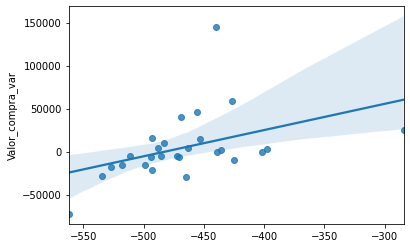

In [117]:
sns.regplot(x = svr.predict(x_norm), y = y)

plt.show()

Results
MSE: 1479995185.078
RMSE: 38470.706
MAE: 24070.802
R2: -0.077


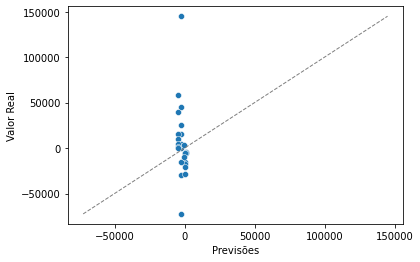

In [118]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, svr, folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

In [119]:
selector_svr = RFE(SVR(kernel='linear'), n_features_to_select=.5, step=1)

selector_svr = selector_svr.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_svr.ranking_, index = labels).sort_values()

Best Features


IDHM 2010                           1
Renda per capita 2010               1
Area_privativa_var                  1
SDO_emprego pela pop_estim          1
Val_compr pela pop_estim            1
SdoEmpresas_var                     1
SaldoEmprego_var                    2
casosAcumulado_12                   3
Valor_contratado_var                4
População_estimada                  5
Taxa_prop_media_var                 6
Val_contr pela pop_estim            7
Densidade_populacional_projetada    8
dtype: int64

In [120]:
pd.DataFrame(
    {
    'RF Feature Importance': np.argsort(-rf.feature_importances_),
    'RF RFE': selector_rf.ranking_,
    'SVR RFE': selector_svr.ranking_
},
    index = labels
)

,RF Feature Importance,RF RFE,SVR RFE
Densidade_populacional_projetada,10,1,8
IDHM 2010,7,5,1
Renda per capita 2010,0,6,1
SaldoEmprego_var,8,1,2
casosAcumulado_12,5,3,3
Valor_contratado_var,12,1,4
Taxa_prop_media_var,4,4,6
Area_privativa_var,11,1,1
População_estimada,6,7,5
SDO_emprego pela pop_estim,1,8,1
